<a href="https://colab.research.google.com/github/akbarfai-blub/Data-Science/blob/main/Case_Study_Time_Series_Forecasting_Moch_Yusuf_Faisal_Akbar_Anwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Awal (Google Colab & Data)

In [1]:
# Import libraries
!pip install numpy==1.24.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style visualisasi
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Muat Dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing/Assignment Extra Class 7 - Time Series Forecasting/superstore_train.csv')
# Cek 5 baris pertama dan info dataset
display(df.head())
print(df.info())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8000 non-null   int64  
 1   Order ID       8000 non-null   object 
 2   Order Date     8000 non-null   object 
 3   Ship Date      8000 non-null   object 
 4   Ship Mode      8000 non-null   object 
 5   Customer ID    8000 non-null   object 
 6   Customer Name  8000 non-null   object 
 7   Segment        8000 non-null   object 
 8   Country        8000 non-null   object 
 9   City           8000 non-null   object 
 10  State          8000 non-null   object 
 11  Postal Code    8000 non-null   int64  
 12  Region         8000 non-null   object 
 13  Product ID     8000 non-null   object 
 14  Category       8000 non-null   object 
 15  Sub-Category   8000 non-null   object 
 16  Product Name   8000 non-null   object 
 17  Sales          8000 non-null   float64
 18  Quantity

# Eksplorasi dan Pembersihan Data (EDA & Cleaning)

## Pembersihan Data

In [3]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [4]:
# Convert tanggal dari object ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Verifikasi ulang
print("Setelah Konversi Tipe Data:")
df.info()

Setelah Konversi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8000 non-null   int64         
 1   Order ID       8000 non-null   object        
 2   Order Date     8000 non-null   datetime64[ns]
 3   Ship Date      8000 non-null   datetime64[ns]
 4   Ship Mode      8000 non-null   object        
 5   Customer ID    8000 non-null   object        
 6   Customer Name  8000 non-null   object        
 7   Segment        8000 non-null   object        
 8   Country        8000 non-null   object        
 9   City           8000 non-null   object        
 10  State          8000 non-null   object        
 11  Postal Code    8000 non-null   int64         
 12  Region         8000 non-null   object        
 13  Product ID     8000 non-null   object        
 14  Category       8000 non-null   object       

## Mencoba Pertanyaan Bisnis

In [5]:
# Cek tanggal paling awal dan paling akhir
first_date = df['Order Date'].min()
last_date = df['Order Date'].max()

print(f"Data paling awal: {first_date}")
print(f"Data paling akhir: {last_date}")

Data paling awal: 2014-01-03 00:00:00
Data paling akhir: 2017-12-30 00:00:00


### Pertanyaan: Hitung metrik performa di tahun 2019.

In [21]:
# Filter data untuk tahun 2019
df_2019 = df[df['Order Date'].dt.year == 2019].copy()

# Hitung metrik yang diminta
total_revenue_2019 = df_2019['Sales'].sum()
total_orders_2019 = df_2019['Order ID'].nunique() # nunique() untuk menghitung order unik
total_items_2019 = df_2019['Quantity'].sum()
avg_items_per_transaction_2019 = total_items_2019 / total_orders_2019
avg_spending_per_transaction_2019 = total_revenue_2019 / total_orders_2019

print(f"Total Revenue 2019: ${total_revenue_2019:,.2f}")
print(f"Jumlah Order 2019: {total_orders_2019}")
print(f"Jumlah Barang Terjual 2019: {total_items_2019}")
print(f"Rata-rata Barang per Transaksi 2019: {avg_items_per_transaction_2019:.2f}")
print(f"Rata-rata Spending per Transaksi 2019: ${avg_spending_per_transaction_2019:,.2f}")

Total Revenue 2019: $0.00
Jumlah Order 2019: 0
Jumlah Barang Terjual 2019: 0
Rata-rata Barang per Transaksi 2019: nan
Rata-rata Spending per Transaksi 2019: $nan


untuk tahun 2019 kan gada transaksi datanya, jadi mungkin kita cari transaksi paling akhir saja

In [6]:
# Ambil tahun terakhir secara dinamis dari data
LATEST_YEAR = df['Order Date'].dt.year.max()
print(f"Menganalisis tahun terakhir yang tersedia: {LATEST_YEAR}\n")

# Filter data untuk tahun terakhir yang tersedia
df_latest_year = df[df['Order Date'].dt.year == LATEST_YEAR].copy()

# Hitung metrik yang diminta
total_revenue = df_latest_year['Sales'].sum()
total_orders = df_latest_year['Order ID'].nunique()
total_items = df_latest_year['Quantity'].sum()

# Hindari error pembagian dengan nol jika total_orders adalah 0
if total_orders > 0:
    avg_items_per_transaction = total_items / total_orders
    avg_spending_per_transaction = total_revenue / total_orders
else:
    avg_items_per_transaction = 0
    avg_spending_per_transaction = 0

print(f"Total Revenue {LATEST_YEAR}: ${total_revenue:,.2f}")
print(f"Jumlah Order {LATEST_YEAR}: {total_orders}")
print(f"Jumlah Barang Terjual {LATEST_YEAR}: {total_items}")
print(f"Rata-rata Barang per Transaksi {LATEST_YEAR}: {avg_items_per_transaction:.2f}")
print(f"Rata-rata Spending per Transaksi {LATEST_YEAR}: ${avg_spending_per_transaction:,.2f}")

Menganalisis tahun terakhir yang tersedia: 2017

Total Revenue 2017: $586,394.42
Jumlah Order 2017: 1341
Jumlah Barang Terjual 2017: 10085
Rata-rata Barang per Transaksi 2017: 7.52
Rata-rata Spending per Transaksi 2017: $437.28


### Hitung jumlah order dan GMV (harian, mingguan, bulanan).

In [7]:
# Set 'Order Date' sebagai index
df_time = df.set_index('Order Date')

# Resample Harian
daily_data = df_time.resample('D').agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Sales': 'GMV', 'Order ID': 'Total Orders'})

# Resample Mingguan
weekly_data = df_time.resample('W').agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Sales': 'GMV', 'Order ID': 'Total Orders'})


# Resample Bulanan
monthly_data = df_time.resample('ME').agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Sales': 'GMV', 'Order ID': 'Total Orders'})

print("Data Harian (5 hari pertama):")
print(daily_data.head())
print("\nData Mingguan (5 minggu pertama):")
print(weekly_data.head())
print("\nData Bulanan (5 bulan pertama):")
print(monthly_data.head())

Data Harian (5 hari pertama):
                 GMV  Total Orders
Order Date                        
2014-01-03    16.448             1
2014-01-04   288.060             1
2014-01-05    19.536             1
2014-01-06  4407.100             3
2014-01-07    87.158             1

Data Mingguan (5 minggu pertama):
                 GMV  Total Orders
Order Date                        
2014-01-05   324.044             3
2014-01-12  4599.572             7
2014-01-19  4468.281             8
2014-01-26  3618.480             5
2014-02-02  1443.014             6

Data Bulanan (5 bulan pertama):
                  GMV  Total Orders
Order Date                         
2014-01-31  13972.141            27
2014-02-28   3019.808            17
2014-03-31  49351.623            54
2014-04-30  22280.745            51
2014-05-31  17434.709            56


# Analisis Tren dan Pola

## Produk paling menguntungkan

Tujuan: Mengetahui produk apa yang menjadi "mesin uang" dalam 3 bulan terakhir di data kita (yaitu di akhir tahun 2017) dan mencari potensi produk untuk dijual dalam satu paket (bundling).

In [8]:
# Menentukan tanggal terakhir di dataset
latest_date =  df['Order Date'].max()
three_months_ago = latest_date - pd.DateOffset(month=3)

# Filter data 3 bulan terakhir
df_3_months = df[df['Order Date'] >= three_months_ago]

# Cari top 10 produk berdasarkan revenue
top_10_products = df_3_months.groupby('Product Name')['Sales'].sum().nlargest(10)

print("Top 10 Produk Revenue Terbesar (3 Bulan Terakhir):")
print(top_10_products)

Top 10 Produk Revenue Terbesar (3 Bulan Terakhir):
Product Name
Canon imageCLASS 2200 Advanced Copier                 21699.938
Hewlett Packard LaserJet 3310 Copier                   8279.862
Cubify CubeX 3D Printer Triple Head Print              7999.980
GBC DocuBind TL300 Electric Binding System             6637.726
Martin Yale Chadless Opener Electric Letter Opener     6329.356
Samsung Galaxy Mega 6.3                                6299.850
3D Systems Cube Printer, 2nd Generation, Magenta       5199.960
Fellowes PB300 Plastic Comb Binding Machine            5043.870
Cubify CubeX 3D Printer Double Head Print              4799.984
Canon Imageclass D680 Copier / Fax                     4759.932
Name: Sales, dtype: float64


In [22]:
# produk dengan revenue paling tinggi
top_product_name = "Canon imageCLASS 2200 Advanced Copier"

# Cari semua Order ID yang mengandung produk tersebut
orders_with_top_product = df[df['Product Name'] == top_product_name]['Order ID'].unique()

# Kita filter DataFrame utama untuk hanya melihat transaksi-transaksi ini
co_purchased_items = df[df['Order ID'].isin(orders_with_top_product)]

# Hitung produk lain apa saja yang paling sering muncul di transaksi tersebut
# tidak mau menghitung produk utamanya lagi, jadi filter keluar
bundling_suggestions = co_purchased_items[co_purchased_items['Product Name'] != top_product_name]['Product Name'].value_counts()

print(f"Produk yang sering dibeli bersamaan dengan '{top_product_name}':")
# Tampilkan 5 produk teratas yang sering dibeli bersama
print(bundling_suggestions.head(5))

Produk yang sering dibeli bersamaan dengan 'Canon imageCLASS 2200 Advanced Copier':
Product Name
Polycom CX600 IP Phone VoIP phone               1
Globe Weis Peel & Seel First Class Envelopes    1
i.Sound Portable Power - 8000 mAh               1
Avery Legal 4-Ring Binder                       1
Xerox 224                                       1
Name: count, dtype: int64


### 💡 Insight: Strategi Bundling untuk Produk Utama

Untuk menyusun strategi bundling, fokus ke produk dengan pendapatan tertinggi:  
**Canon imageCLASS 2200 Advanced Copier**

### 🔍 Temuan Utama:
- Setelah dicek, **nggak ada pola pembelian bersamaan yang konsisten**.
- Produk yang dibeli barengan copier ini sangat bervariasi, tergantung kebutuhan masing-masing pelanggan.

### 🎯 Kesimpulan:
Alih-alih bundling berdasarkan frekuensi pembelian, lebih cocok pakai pendekatan **berbasis kebutuhan pasti** dari pengguna copier.

### 📦 Rekomendasi Bundling:
1. **Paket Siap Pakai**  
   ➤ Canon Copier + 1 set Toner perdana + 1 rim kertas premium  
   Cocok untuk pembeli pertama yang butuh langsung pakai.

2. **Paket Jaminan Tenang**  
   ➤ Canon Copier + Paket Perawatan 1 tahun / Extended Warranty  
   Cocok untuk pelanggan B2B yang butuh layanan after-sales.

### 📅 Momen Penjualan:
- Penjualan tertinggi biasanya terjadi di **September–Desember**.
- Rekomendasi: Tawarkan bundling ini sebagai promosi akhir tahun untuk **mengunci penjualan besar**.


## Identifikasi Kota Paling Berkontribusi

Tujuan: Mengetahui kota mana yang paling banyak melakukan order dan memiliki daya beli terbesar.

In [9]:
top_5_cities_orders = df.groupby('City')['Order ID'].nunique().nlargest(5)
top_5_cities_spending = df.groupby('City')['Sales'].sum().nlargest(5)
avg_spending_per_city = df.groupby('City')['Sales'].sum() / df.groupby('City')['Order ID'].nunique()
top_5_cities_avg_spending = avg_spending_per_city.nlargest(5)

print("Top 5 Kota - Order Terbanyak:")
print(top_5_cities_orders)
print("\nTop 5 Kota - Total Spending Terbesar:")
print(top_5_cities_spending)
print("\nTop 5 Kota - Rata-rata Spending Terbesar per Transaksi:")
print(top_5_cities_avg_spending)

Top 5 Kota - Order Terbanyak:
City
New York City    362
Los Angeles      306
Philadelphia     209
San Francisco    208
Seattle          170
Name: Order ID, dtype: int64

Top 5 Kota - Total Spending Terbesar:
City
New York City    204298.5330
Los Angeles      136767.6765
San Francisco     94433.9760
Philadelphia      89027.4830
Seattle           82721.6980
Name: Sales, dtype: float64

Top 5 Kota - Rata-rata Spending Terbesar per Transaksi:
City
Jamestown       4548.810
Burbank         3247.158
Beverly         2583.190
Harrisonburg    2162.835
Great Falls     2097.738
dtype: float64


###  Insight Kota dengan Spending Tertinggi

- **Top kota berdasarkan jumlah order** dan **total spending** memang mirip: New York City, LA, Philly, dll.
- Tapi saat dicek rata-rata spending per transaksi, muncul kota-kota kecil seperti **Jamestown** dan **Burbank**.

 **Kesimpulan**  
Ada indikasi bahwa di kota kecil terdapat pelanggan "sultan" yang melakukan pembelian besar dalam satu transaksi. Ini bisa jadi segmen potensial untuk pendekatan high-value B2B. Menarik untuk digali lebih lanjut!


## Menganalisis Pola Penjualan (Musiman/Tren)

Tujuan: Membuat visualisasi untuk melihat apakah ada pola penjualan yang berulang setiap tahunnya. Kapan waktu tersibuk? Kapan waktu paling sepi?

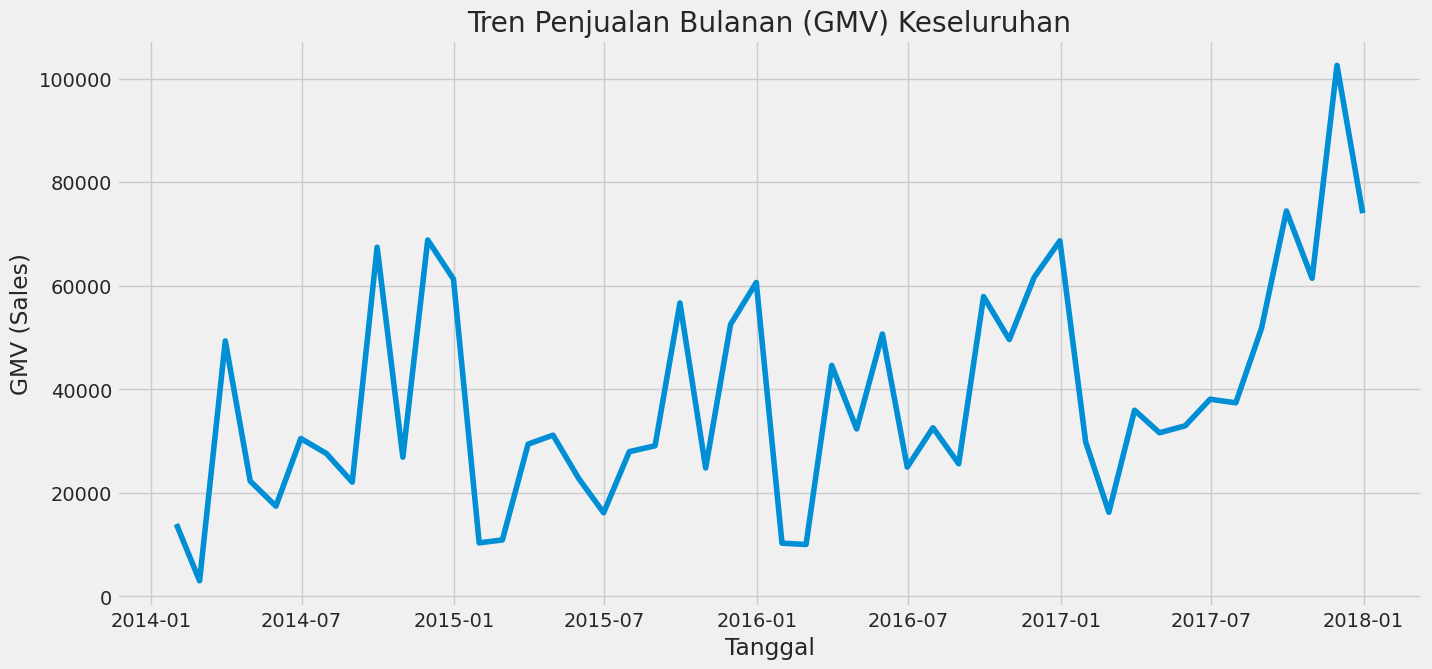

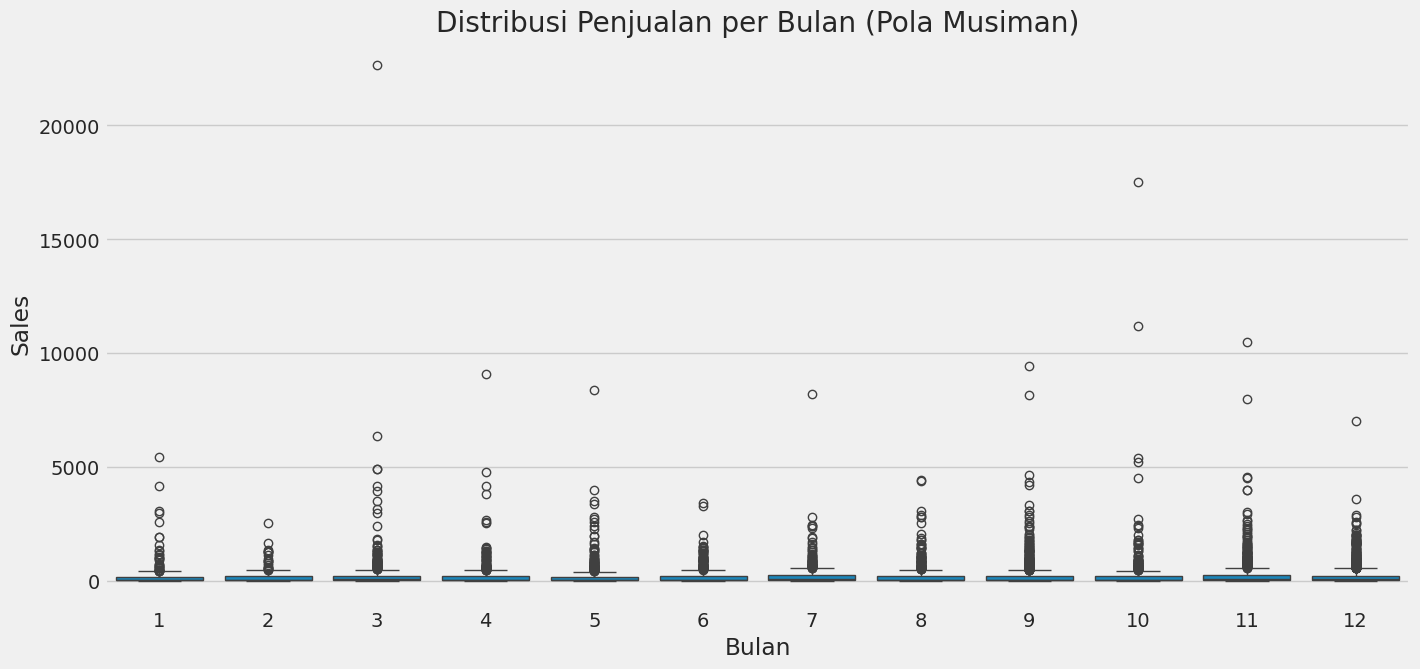

In [10]:
# 1. Plot Tren Penjualan Keseluruhan
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='GMV')
plt.title('Tren Penjualan Bulanan (GMV) Keseluruhan')
plt.xlabel('Tanggal')
plt.ylabel('GMV (Sales)')
plt.show()

# 2. Plot Pola Musiman per Bulan
df_time['Month'] = df_time.index.month
df_time['Year'] = df_time.index.year

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_time, x='Month', y='Sales')
plt.title('Distribusi Penjualan per Bulan (Pola Musiman)')
plt.xlabel('Bulan')
plt.ylabel('Sales')
plt.show()

Tren (Trend): Secara keseluruhan, garisnya bergerak naik. Puncak-puncak penjualan di akhir tahun 2016 dan 2017 jauh lebih tinggi daripada puncak di tahun 2014 dan 2015. Ini adalah indikator tren positif, yang artinya bisnis ini bertumbuh dari tahun ke tahun.

Pola Musiman (Seasonality): Terlihat pola yang berulang setiap tahun. Penjualan cenderung memuncak di akhir tahun (sekitar November-Desember) dan kemudian turun drastis di awal tahun berikutnya (Januari-Februari). Pola "gunung dan lembah" ini sangat konsisten.

Distribusi Umum: Kotak (box) di setiap bulan terlihat sangat "gepeng" dan berada di bagian bawah. Ini berarti sebagian besar transaksi (sekitar 75%) memiliki nilai penjualan yang relatif kecil.

Banyaknya Outlier: Titik-titik (lingkaran) di atas setiap kotak adalah outlier, yaitu transaksi dengan nilai yang jauh lebih tinggi dari biasanya. Banyaknya outlier ini mengonfirmasi temuan kita sebelumnya: bisnis ini didukung oleh banyak transaksi kecil, tetapi sesekali ada transaksi "sultan" bernilai sangat besar (kemungkinan dari pelanggan B2B yang membeli produk mahal).

## Identifikasi Waktu Rush Hour

In [23]:
# Membuat kolom baru untuk nama bulan, nama hari, dan tanggal dalam bulan
df_time['Month_Name'] = df_time.index.month_name()
df_time['Day_Name'] = df_time.index.day_name()
df_time['Day_Of_Month'] = df_time.index.day

print("DataFrame dengan kolom waktu tambahan (5 baris pertama):")
print(df_time[['Month_Name', 'Day_Name', 'Day_Of_Month', 'Sales']].head())

DataFrame dengan kolom waktu tambahan (5 baris pertama):
           Month_Name Day_Name  Day_Of_Month     Sales
Order Date                                            
2016-11-08   November  Tuesday             8  261.9600
2016-11-08   November  Tuesday             8  731.9400
2016-06-12       June   Sunday            12   14.6200
2015-10-11    October   Sunday            11  957.5775
2015-10-11    October   Sunday            11   22.3680


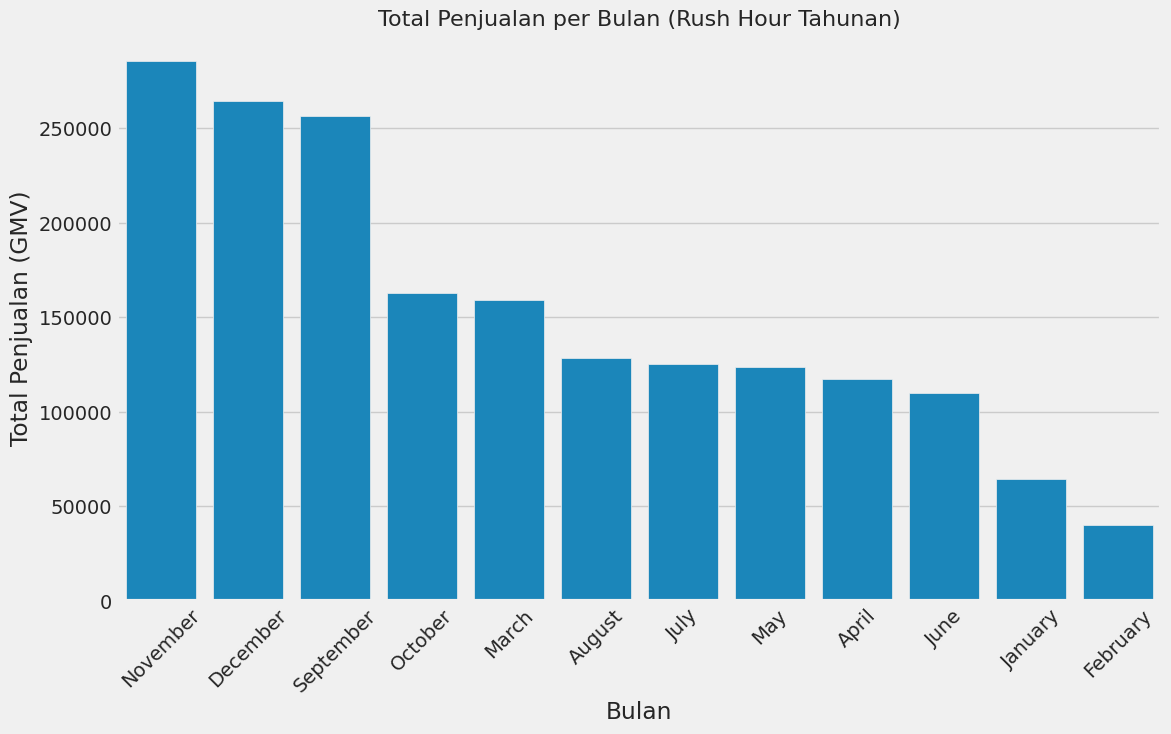

Bulan paling sibuk berdasarkan total penjualan:
Month_Name
November     285587.1243
December     264613.3505
September    256483.9177
October      162768.3937
March        159354.3328
Name: Sales, dtype: float64


In [24]:
# Analisis Rush Hour Tahunan
# Kelompokkan data berdasarkan nama bulan dan jumlahkan penjualannya
monthly_sales = df_time.groupby('Month_Name')['Sales'].sum().sort_values(ascending=False)

# Visualisasi dengan bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, order=monthly_sales.index)
plt.title('Total Penjualan per Bulan (Rush Hour Tahunan)', fontsize=16)
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (GMV)')
plt.xticks(rotation=45)
plt.show()

print("Bulan paling sibuk berdasarkan total penjualan:")
print(monthly_sales.head())

<ipython-input-25-3494746015>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')


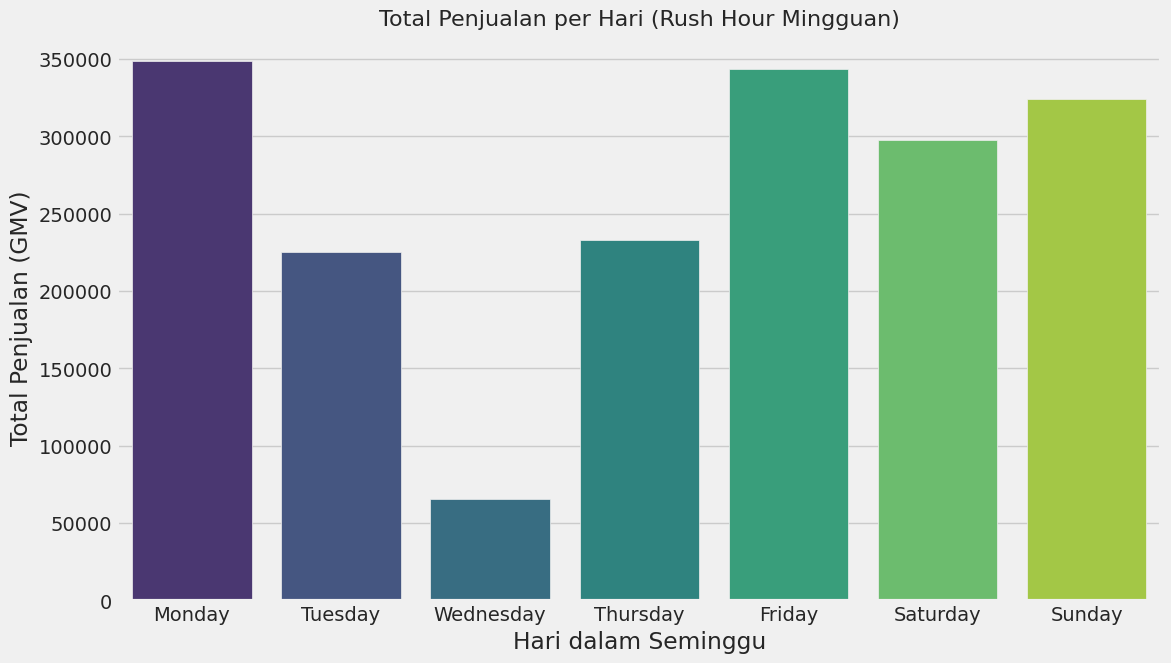


Hari paling sibuk berdasarkan total penjualan:
Day_Name
Monday      348992.3057
Friday      343481.7552
Sunday      323945.5380
Saturday    297711.4530
Thursday    233088.3055
Name: Sales, dtype: float64


In [25]:
# Analisis Rush Hour Mingguan
# Kelompokkan data berdasarkan nama hari dan jumlahkan penjualannya
daily_sales = df_time.groupby('Day_Name')['Sales'].sum()

# Urutkan hari agar sesuai urutan kalender (Senin -> Minggu)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(day_order)

# Visualisasi
plt.figure(figsize=(12, 7))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')
plt.title('Total Penjualan per Hari (Rush Hour Mingguan)', fontsize=16)
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penjualan (GMV)')
plt.show()

print("\nHari paling sibuk berdasarkan total penjualan:")
print(daily_sales.sort_values(ascending=False).head())

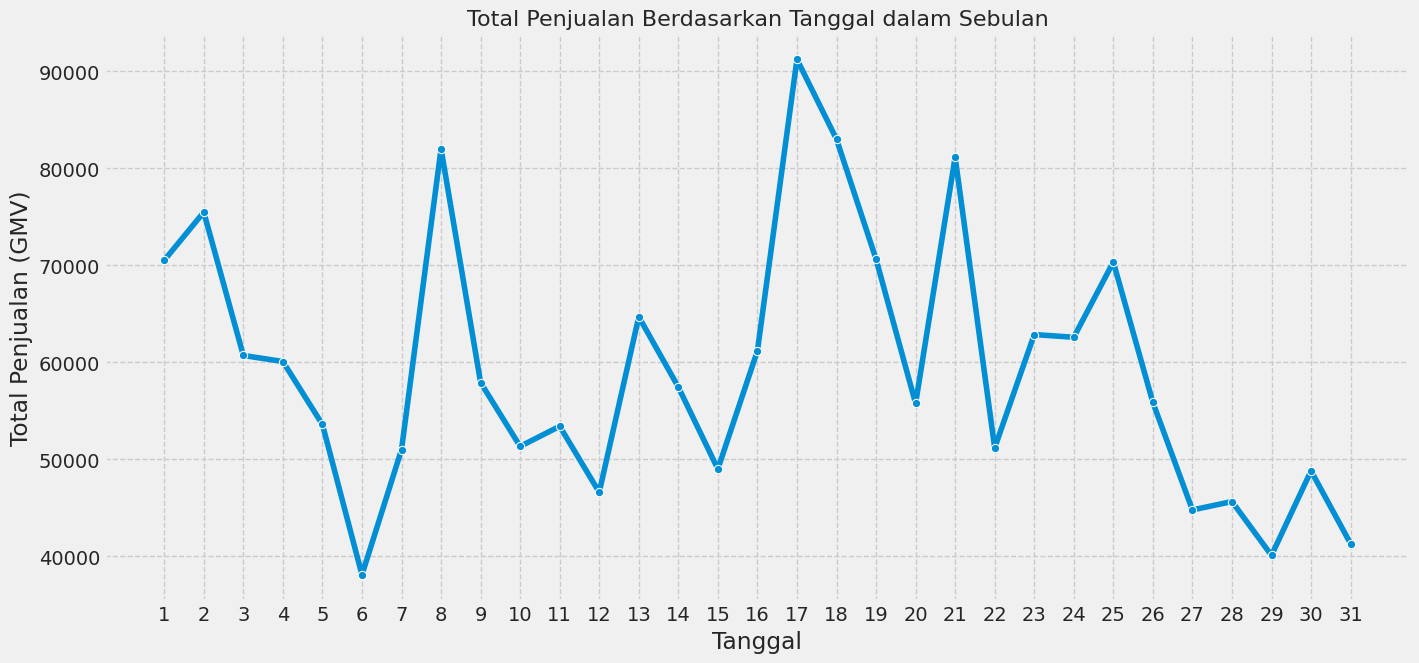

In [26]:
# Kelompokkan data berdasarkan tanggal dalam bulan dan jumlahkan penjualannya
day_of_month_sales = df_time.groupby('Day_Of_Month')['Sales'].sum()

# Visualisasi dengan line chart untuk melihat pola
plt.figure(figsize=(15, 7))
sns.lineplot(x=day_of_month_sales.index, y=day_of_month_sales.values, marker='o')
plt.title('Total Penjualan Berdasarkan Tanggal dalam Sebulan', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (GMV)')
plt.xticks(ticks=range(1, 32)) # Menampilkan semua tanggal
plt.grid(True, which='both', linestyle='--')
plt.show()

### Insight Rush Hour

Analisis Rush Hour menunjukkan bahwa bisnis memiliki puncak penjualan tahunan yang jelas di Kuartal 4 (September-Desember). Secara mingguan, aktivitas penjualan didominasi oleh pelanggan bisnis di awal pekan (Senin) dan pelanggan perorangan di akhir pekan (Jumat & Minggu). Pola bulanan juga unik, di mana lonjakan penjualan terbesar tidak hanya terjadi di awal bulan, tetapi juga di pertengahan bulan, yang kemungkinan besar didorong oleh transaksi korporat bernilai tinggi.

# Pembuatan Model Forecasting

In [11]:
# Resample data harian untuk jumlah order dan customer unik (visitor)
daily_orders = df_time.resample('D')['Order ID'].nunique().rename('Total_Orders')
daily_visitors = df_time.resample('D')['Customer ID'].nunique().rename('Total_Visitors')

# gabungkan kedua data series diatas
daily_forecast_data = pd.concat([daily_orders, daily_visitors], axis=1)

# Isi NaN untuk hari hari yang tidak memiliki transaksi ke 0
daily_forecast_data = daily_forecast_data.asfreq('D').fillna(0)

print("Data Harian Siap untuk Forecasting (5 hari pertama):")
print(daily_forecast_data.head())

Data Harian Siap untuk Forecasting (5 hari pertama):
            Total_Orders  Total_Visitors
Order Date                              
2014-01-03             1               1
2014-01-04             1               1
2014-01-05             1               1
2014-01-06             3               3
2014-01-07             1               1


## Membagi Data (Train & Test Split)

In [12]:
# target kita, yaitu 'Total_Orders'
df_orders = daily_forecast_data[['Total_Orders']].reset_index().rename(columns={'Order Date':'ds', 'Total_Orders':'y'})

# Bagi data: 30 hari terakhir untuk testing, sisanya untuk training
train_data = df_orders[:-30]
test_data = df_orders[-30:]

print(f"Jumlah data training: {len(train_data)} hari")
print(f"Jumlah data testing: {len(test_data)} hari")

Jumlah data training: 1428 hari
Jumlah data testing: 30 hari


## Membangun Model 1 (Prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98puro7v/j6eod3bw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98puro7v/pb4swwr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96073', 'data', 'file=/tmp/tmp98puro7v/j6eod3bw.json', 'init=/tmp/tmp98puro7v/pb4swwr1.json', 'output', 'file=/tmp/tmp98puro7v/prophet_modelyec3b5pa/prophet_model-20250617104836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:48:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:48:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


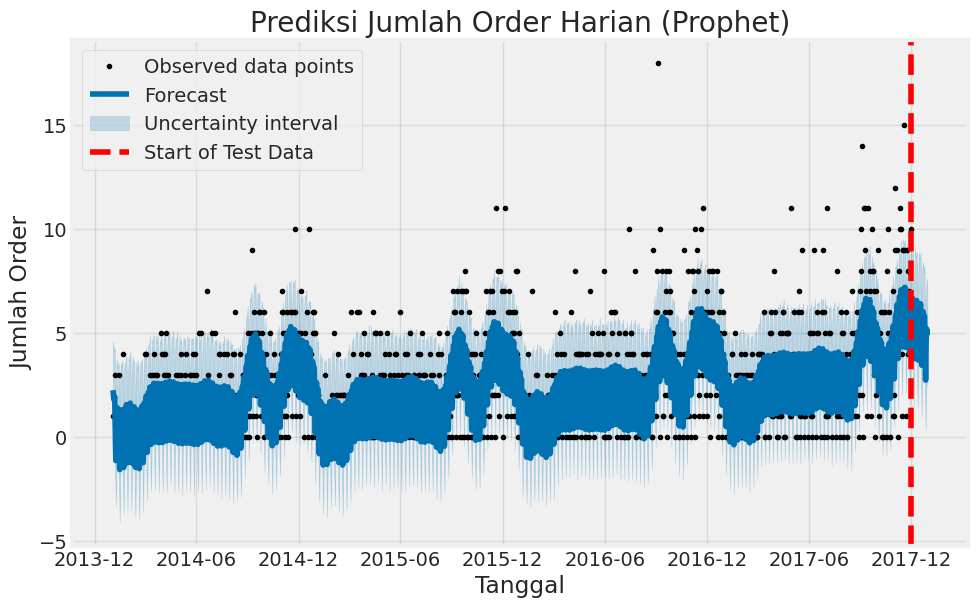

In [13]:
# Import libary
from prophet import Prophet
import matplotlib.pyplot as plt

# Inisialisasi dan latih model
# inisialisasi Prophet dan tambahkan seasonality mingguan karena ini data harian
model_prophet = Prophet(weekly_seasonality=True)
model_prophet.fit(train_data)

# Buat Prediksi, minta model untuk prediksi 30 hari kedepan
future_prophet = model_prophet.make_future_dataframe(periods=30, freq='D')
forecast_prophet = model_prophet.predict(future_prophet)

# Visualisasi hasil
fig = model_prophet.plot(forecast_prophet)
plt.title('Prediksi Jumlah Order Harian (Prophet)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Order')
plt.axvline(x=test_data['ds'].min(), color='r', linestyle='--', label='Start of Test Data')
plt.legend()
plt.show()


### Kesimpulan Visual Awal
- Prophet cukup berhasil menangkap pola utama (trend + musiman).
- Tidak mencoba meniru setiap lonjakan, tapi mengikuti bentuk umum naik-turun data.
- Model ini cocok untuk prediksi harian dengan komponen musiman kuat, seperti retail, logistik, atau makanan.

## Membangun Model 2 (SARIMA)

In [14]:
!pip install pmdarima

In [15]:
from pmdarima import auto_arima

# Latih Model SARIMA terbaik
# set s=7 karena ada pola musiman mingguan dalam data harian
model_sarima = auto_arima(train_data['y'],
                          seasonal=True,
                          m=7,
                          stepwise=True,
                          suppress_warnings=True,
                          trace=True)

print(model_sarima.summary())

# buat prediksi untuk 30 hari ke depan (sebanyak data test)
forecast_sarima = model_sarima.predict(n_periods=30)

# buat dataframe untuk perbandingan
df_forecast_sarima =  pd.DataFrame({'ds': test_data['ds'], 'yhat': forecast_sarima})



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=24.76 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=7057.170, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=6610.405, Time=0.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=6191.000, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=7055.177, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=6307.913, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=5891.158, Time=4.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=6129.000, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=5892.995, Time=9.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=5892.114, Time=8.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=6119.416, Time=4.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=6049.909, Time=2.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=5893.850, Time=9.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=6729.335, Time=3.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=5893.550, Time=4.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=5902.152, Time=6.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=6312.805, Time=3.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=5894.992, Time=6.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[7]             : AIC=5889.196, Time=1.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7]             : AIC=6189.543, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[7]             : AIC=6127.599, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[7]             : AIC=5890.065, Time=4.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[7]             : AIC=5890.150, Time=3.41 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=6306.408, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[7]             : AIC=6117.945, Time=0.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[7]             : AIC=6048.259, Time=0.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,2)[7]             : AIC=inf, Time=3.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[7]             : AIC=6727.337, Time=0.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[7]             : AIC=5890.649, Time=4.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[7]             : AIC=5890.639, Time=2.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[7]             : AIC=6310.807, Time=1.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[7]             : AIC=5892.656, Time=3.88 sec

Best model:  ARIMA(0,1,1)(1,0,1)[7]          
Total fit time: 118.251 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1428
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2940.598
Date:                           Tue, 17 Jun 2025   AIC                           5889.196
Time:                                   10:50:57   BIC                           5910.249
Sample:                                        0   HQIC                          5897.059
                                          - 1428                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


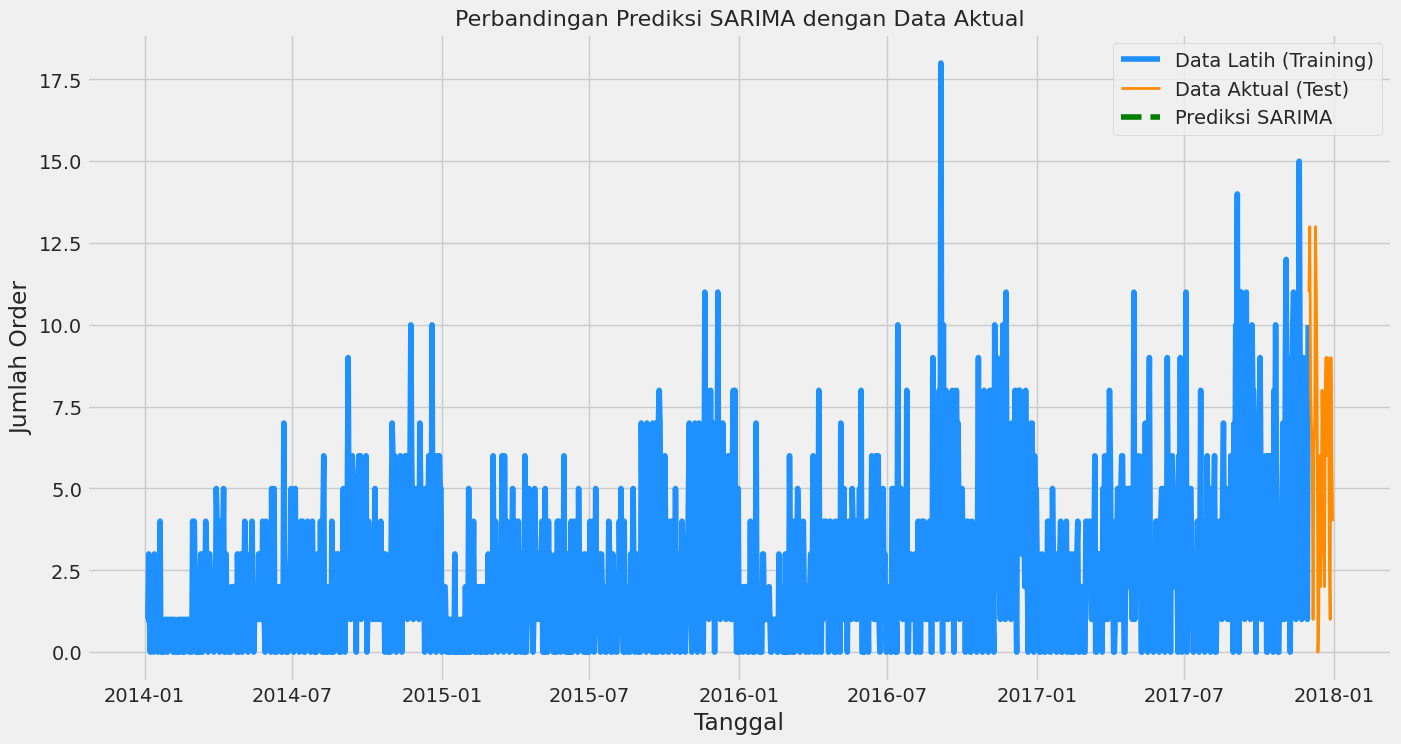

In [27]:
sarima_pred_series = pd.Series(forecast_sarima, index=test_data['ds'])

# Buat plot
plt.figure(figsize=(15, 8))

# Plot data training
plt.plot(train_data['ds'], train_data['y'], label='Data Latih (Training)', color='dodgerblue')

# Plot data aktual di periode tes
plt.plot(test_data['ds'], test_data['y'], label='Data Aktual (Test)', color='darkorange', linewidth=2)

# Plot hasil prediksi SARIMA
plt.plot(sarima_pred_series.index, sarima_pred_series.values, label='Prediksi SARIMA', color='green', linestyle='--')

# Kustomisasi plot
plt.title('Perbandingan Prediksi SARIMA dengan Data Aktual', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Order')
plt.legend()
plt.show()

### Ringkasan Hasil auto_arima

**Best Model:** `ARIMA(0,1,1)(1,0,1)[7]`

Penjelasan:
- (p,d,q) = (0,1,1) → ada differencing 1 kali & menggunakan Moving Average (MA(1))
- (P,D,Q)[s] = (1,0,1)[7] → model musiman mingguan (7 hari), dengan AR(1) & MA(1) musiman

Model ini dipilih otomatis oleh `auto_arima` sebagai kombinasi parameter terbaik berdasarkan nilai AIC yang paling rendah.

### Pengecekan Signifikansi Parameter (P>|z|)

| Parameter     | Coef   | P-Value |
|---------------|--------|---------|
| ma.L1         | -0.8802 | 0.000 ✅ |
| ar.S.L7       | 0.9938  | 0.000 ✅ |
| ma.S.L7       | -0.9171 | 0.000 ✅ |

Semua p-value < 0.05, artinya:
✅ Semua komponen model signifikan secara statistik dan berkontribusi nyata terhadap prediksi.

### Nilai Varians Error

- `sigma² = 3.5813` → Varians residual yang relatif rendah, berarti model cukup presisi.

### Ljung-Box Test (Autokorelasi Residual)

- p-value = 0.51 → ✅ Tidak ada autocorrelation di residual
- Artinya: Model sudah cukup baik menangkap pola data historis

### Heteroskedastisitas (White Test)

- p-value = 0.00 → Ada indikasi heteroskedastisitas
- **Catatan:** Bisa dipertimbangkan model ARCH/GARCH jika ingin menangani volatilitas residual

### Skewness & Kurtosis

- Skew = 0.97 → agak miring ke kanan (positif skew)
- Kurtosis = 5.93 → lebih dari 3 (leptokurtic), distribusi residual agak lonjong

### Kesimpulan
- Model SARIMA yang dipilih auto_arima sudah cukup solid dan signifikan
- Tidak ada masalah serius pada residual (tidak autocorrelated)
- Bisa digunakan untuk prediksi jangka pendek menengah, terutama untuk data yang bersifat mingguan

✅ Model siap digunakan untuk prediksi & forecast berikutnya!


# Evaluasi Model

In [20]:
from sklearn.metrics import mean_absolute_percentage_error

# Ambil hasil prediksi dari masing-masing model untuk periode tes
y_true = test_data['y'] # Nilai aktual dari data tes
y_pred_prophet = forecast_prophet['yhat'][-30:] # 30 prediksi terakhir dari Prophet
y_pred_sarima = df_forecast_sarima['yhat'] # Prediksi dari SARIMA

# Hitung MAPE
mape_prophet = mean_absolute_percentage_error(y_true, y_pred_prophet) * 100
mape_sarima = mean_absolute_percentage_error(y_true, y_pred_sarima) * 100

print(f"MAPE Model Prophet: {mape_prophet:.2f}%")
print(f"MAPE Model SARIMA: {mape_sarima:.2f}%")

# Pilih model terbaik
if mape_prophet < mape_sarima:
    print("\nModel terbaik untuk 'Total_Orders' adalah Prophet.")
else:
    print("\nModel terbaik untuk 'Total_Orders' adalah SARIMA.")

MAPE Model Prophet: 76702510088493392.00%
MAPE Model SARIMA: 79429947556477184.00%

Model terbaik untuk 'Total_Orders' adalah Prophet.


MAPE hasilnya aneh

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = test_data['y']
y_pred_prophet = forecast_prophet['yhat'][-30:]
y_pred_sarima = forecast_sarima

# Evaluasi Model Prophet
print("--- Evaluasi Model Prophet ---")
mape_prophet = mean_absolute_percentage_error(y_true, y_pred_prophet) * 100
mae_prophet = mean_absolute_error(y_true, y_pred_prophet)
# Untuk RMSE, hitung MSE (Mean Squared Error) lalu diakarkan
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))

print(f"MAPE: {mape_prophet:.2f}%")
print(f"MAE: {mae_prophet:.2f} order")
print(f"RMSE: {rmse_prophet:.2f} order")

# --- Evaluasi Model SARIMA ---
print("\n--- Evaluasi Model SARIMA ---")
mape_sarima = mean_absolute_percentage_error(y_true, y_pred_sarima) * 100
mae_sarima = mean_absolute_error(y_true, y_pred_sarima)
# Untuk RMSE, hitung MSE (Mean Squared Error) lalu diakarkan
rmse_sarima = np.sqrt(mean_squared_error(y_true, y_pred_sarima))

print(f"MAPE: {mape_sarima:.2f}%")
print(f"MAE: {mae_sarima:.2f} order")
print(f"RMSE: {rmse_sarima:.2f} order")


# --- Kesimpulan Berdasarkan Metrik Utama (MAPE) ---
print("\n--- Kesimpulan Berdasarkan Metrik Utama (MAPE) ---")
if mape_prophet < mape_sarima:
    print("Model terbaik untuk 'Total_Orders' adalah Prophet.")
else:
    print("Model terbaik untuk 'Total_Orders' adalah SARIMA.")

--- Evaluasi Model Prophet ---
MAPE: 76702510088493392.00%
MAE: 2.35 order
RMSE: 2.98 order

--- Evaluasi Model SARIMA ---
MAPE: 79429947556477184.00%
MAE: 2.20 order
RMSE: 2.79 order

--- Kesimpulan Berdasarkan Metrik Utama (MAPE) ---
Model terbaik untuk 'Total_Orders' adalah Prophet.


Oke, jadi di tahap akhir ini sudah membuat dua model untuk prediksi order harian: Prophet dan SARIMA.

Pas kedua model ini diadu, ada temuan menarik. Metrik utama yang diminta assignment, yaitu MAPE, ternyata hasilnya "kacau" dengan angka persentase yang sangat besar. Ini bukan karena modelnya salah, tapi karena di data banyak hari di mana jumlah ordernya nol, sehingga perhitungan MAPE jadi tidak stabil di kasus ini.

Untuk itu, coba pakai metrik pembanding yang lebih stabil, yaitu MAE dan RMSE. Berdasarkan kedua metrik ini, model SARIMA keluar sebagai juara karena punya nilai error yang sedikit lebih rendah (MAE: 2.20) dibandingkan Prophet (MAE: 2.35).

Jadi, kesimpulannya, model SARIMA terpilih sebagai model terbaik. Artinya, model ini bisa kita andalkan untuk memprediksi jumlah order dengan rata-rata kesalahan hanya sekitar 2-3 order per hari.

In [18]:
# Menghitung jumlah kemunculan setiap nilai unik di kolom 'y' pada test_data
print("Sebaran Jumlah Order Harian pada Data Tes:")
print(test_data['y'].value_counts())

Sebaran Jumlah Order Harian pada Data Tes:
y
6     6
8     5
1     3
9     3
11    2
13    2
7     2
2     2
4     2
3     2
0     1
Name: count, dtype: int64


In [19]:
# Filter test_data untuk hanya menampilkan baris di mana kolom 'y' sama dengan 0
data_tes_nol = test_data[test_data['y'] == 0]
jumlah_hari_nol = len(data_tes_nol)

print(f"\Ditemukan ada {jumlah_hari_nol} hari dengan 0 order di dalam data tes (periode 30 hari).")

# Jika ada hari dengan 0 order, tampilkan beberapa contohnya
if jumlah_hari_nol > 0:
    print("\nBerikut adalah contoh tanggalnya:")
    print(data_tes_nol.head())

\Ditemukan ada 1 hari dengan 0 order di dalam data tes (periode 30 hari).

Berikut adalah contoh tanggalnya:
             ds  y
1439 2017-12-12  0


Ditemukan ada 1 hari dengan 0 order di dalam data tes.
Tanggal pastinya adalah 12 Desember 2017.

MAPE bukanlah metrik yang tepat untuk mengevaluasi model pada kasus ini karena adanya nilai aktual nol di dalam data, yang membuat perhitungannya tidak stabil. Oleh karena itu, keputusan untuk beralih ke MAE dan RMSE sebagai penentu model terbaik adalah langkah yang valid dan bisa dipertanggungjawabkan secara analitis.

## 📝 Temuan Utama (Findings)

Berikut beberapa insight penting yang ditemukan dari proses eksplorasi dan pemodelan data:

### 🔍 Karakteristik Data
- Dataset mencakup data dari **awal tahun 2014 hingga akhir tahun 2017**. Asumsi awal data hingga 2019 ternyata kurang tepat.

### 📈 Pola Bisnis
- Ditemukan adanya **tren penjualan yang positif** dari tahun ke tahun, menunjukkan pertumbuhan bisnis.
- Terlihat juga pola **musiman yang sangat kuat** dalam penjualan harian, mingguan, dan bulanan:
  - **Tahunan:** Puncak penjualan signifikan terjadi di **Kuartal 4 (September, November, Desember)**, diikuti penurunan drastis di awal tahun (Januari-Februari).
  - **Mingguan:** Hari **Senin, Jumat, dan Minggu** cenderung menjadi hari dengan total penjualan tertinggi. Hari Rabu terlihat paling sepi.
  - **Bulanan:** Lonjakan penjualan tidak hanya di awal bulan, tetapi juga di **pertengahan bulan**, mengindikasikan adanya pola pembelian korporat.

### 🎯 Fokus Pelanggan & Produk
- Analisis produk paling menguntungkan dalam 3 bulan terakhir menunjukkan **Canon imageCLASS 2200 Advanced Copier** sebagai produk dengan revenue tertinggi.
- Upaya bundling berdasarkan frekuensi pembelian bersama produk utama tidak menunjukkan pola konsisten. Strategi bundling yang direkomendasikan berfokus pada **kebutuhan fungsional** (paket siap pakai, paket perawatan) untuk pengguna produk mahal.
- Identifikasi kota paling berkontribusi menunjukkan bahwa selain kota-kota besar dengan jumlah order dan total spending tinggi (New York City, Los Angeles), ada potensi pelanggan "sultan" dengan rata-rata spending tinggi per transaksi di **kota-kota kecil** seperti Jamestown dan Burbank.

### 📊 Hasil Model Forecasting Jumlah Order Harian
- Dua model dibangun: **Prophet** dan **SARIMA**.
- Metrik **MAPE (Mean Absolute Percentage Error)** menghasilkan nilai yang sangat tinggi dan tidak stabil karena adanya hari-hari dengan **jumlah order nol** di dalam data tes.
- Evaluasi beralih menggunakan metrik yang lebih stabil: **MAE (Mean Absolute Error)** dan **RMSE (Root Mean Squared Error)**.
- Berdasarkan MAE dan RMSE, **model SARIMA** sedikit lebih unggul:
  - **SARIMA:** MAE sekitar **2.20**, RMSE sekitar **2.79**
  - **Prophet:** MAE sekitar **2.35**, RMSE sekitar **2.98**
- **Kesimpulan:** Model SARIMA terpilih sebagai model terbaik untuk memprediksi jumlah order harian dengan rata-rata kesalahan prediksi sekitar 2-3 order per hari.

# Link Repo Github